In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)

## Generate Randomized Data

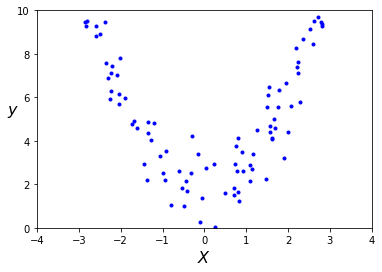

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**2 + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-4, 4, 0, 10])
plt.show()

## Fitting a Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([5.46427481]), array([[-0.01433952]]))

In [9]:
y_predict = lin_reg.predict(X)

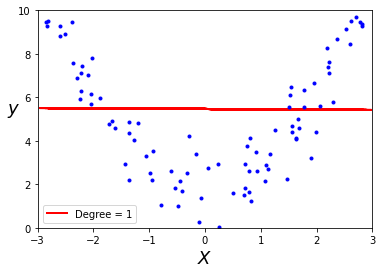

In [69]:
plt.plot(X, y_predict, "r-", linewidth=2, label="Degree = 1")
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="lower left", fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

9.728865215001655

## Fitting 2nd-degree Regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.82171513]), array([[-0.01461896,  1.06971982]]))

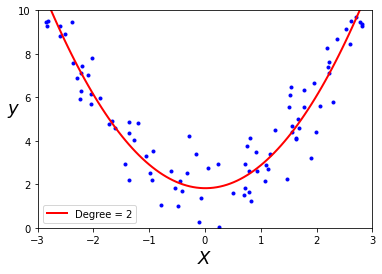

In [73]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Degree = 2")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="lower left", fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

## Fitting 100th-degree Regression

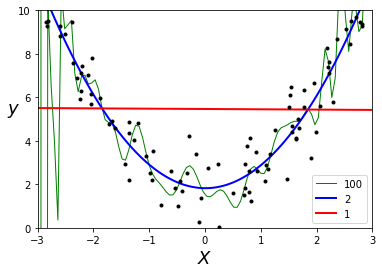

In [65]:
for style, width, degree in (("g-", 1, 100), ("b-", 2, 2), ("r-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="lower right")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()